In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [15]:
BASE_RESULTS = r"C:\Users\Manaswini\Downloads\anomaly"

lstm_unsup = pd.read_csv(os.path.join(BASE_RESULTS, "result_lstm_us", "fault_metrics.csv"))
lstm_sup   = pd.read_csv(os.path.join(BASE_RESULTS, "result_lstm_s", "supervised_test_metrics.csv"))
mset       = pd.read_csv(os.path.join(BASE_RESULTS, "result_mset", "mset_metrics.csv"))
iso        = pd.read_csv(os.path.join(BASE_RESULTS, "result_isolation_forest", "isolation_forest_metrics.csv"))

lstm_unsup["Model"] = "LSTM Unsupervised"
lstm_sup["Model"]   = "LSTM Supervised"
mset["Model"]       = "MSET"
iso["Model"]        = "Isolation Forest"

In [17]:
print("LSTM Unsupervised columns:", lstm_unsup.columns.tolist())
print("LSTM Supervised columns:", lstm_sup.columns.tolist())
print("MSET columns:", mset.columns.tolist())
print("Isolation Forest columns:", iso.columns.tolist())

LSTM Unsupervised columns: ['Folder', 'File', 'Mean_Recon_Error', 'Max_Recon_Error', 'Anomaly_Ratio', 'Model']
LSTM Supervised columns: ['Folder', 'File', 'Accuracy', 'Precision', 'Recall', 'F1', 'Model']
MSET columns: ['Folder', 'File', 'Mean_Error', 'Max_Error', 'Anomaly_Ratio', 'Model']
Isolation Forest columns: ['Folder', 'File', 'Anomaly_Ratio', 'Model']


In [18]:
def normalize(df):
    df = df.copy()
    df.columns = df.columns.str.lower()
    return df

lstm_unsup = normalize(lstm_unsup)
lstm_sup   = normalize(lstm_sup)
mset       = normalize(mset)
iso        = normalize(iso)

In [20]:
anomaly_models = pd.concat([
    lstm_unsup[["folder", "file", "anomaly_ratio", "model"]],
    mset[["folder", "file", "anomaly_ratio", "model"]],
    iso[["folder", "file", "anomaly_ratio", "model"]]
], ignore_index=True)

anomaly_models.head()

,folder,file,anomaly_ratio,model
0,Valve1,0.csv,1.0,LSTM Unsupervised
1,Valve1,1.csv,1.0,LSTM Unsupervised
2,Valve1,2.csv,1.0,LSTM Unsupervised
3,Valve1,3.csv,1.0,LSTM Unsupervised
4,Valve1,4.csv,1.0,LSTM Unsupervised


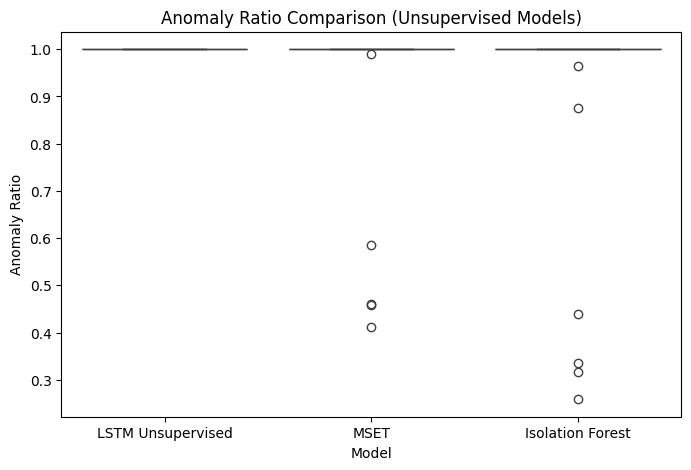

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=anomaly_models,
    x="model",
    y="anomaly_ratio"
)
plt.title("Anomaly Ratio Comparison (Unsupervised Models)")
plt.ylabel("Anomaly Ratio")
plt.xlabel("Model")
plt.show()

In [22]:
mean_anomaly = (
    anomaly_models
    .groupby("model")["anomaly_ratio"]
    .mean()
    .reset_index()
)

mean_anomaly

,model,anomaly_ratio
0,Isolation Forest,0.917398
1,LSTM Unsupervised,1.000000
2,MSET,0.938408


In [23]:
sup_metrics = lstm_sup.melt(
    id_vars=["folder", "file", "model"],
    value_vars=["accuracy", "precision", "recall", "f1"],
    var_name="metric",
    value_name="score"
)

sup_metrics.head()

,folder,file,model,metric,score
0,Valve1,0.csv,LSTM Supervised,accuracy,1.0
1,Valve1,1.csv,LSTM Supervised,accuracy,1.0
2,Valve1,2.csv,LSTM Supervised,accuracy,1.0
3,Valve1,3.csv,LSTM Supervised,accuracy,1.0
4,Valve1,4.csv,LSTM Supervised,accuracy,1.0


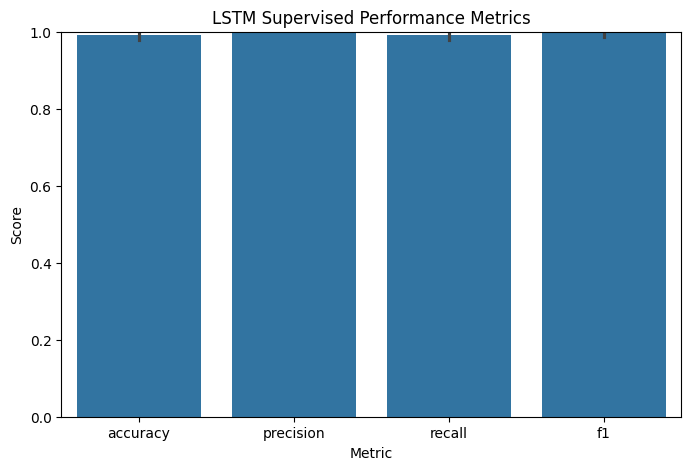

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=sup_metrics,
    x="metric",
    y="score",
    estimator="mean"
)
plt.title("LSTM Supervised Performance Metrics")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.ylim(0, 1)
plt.show()

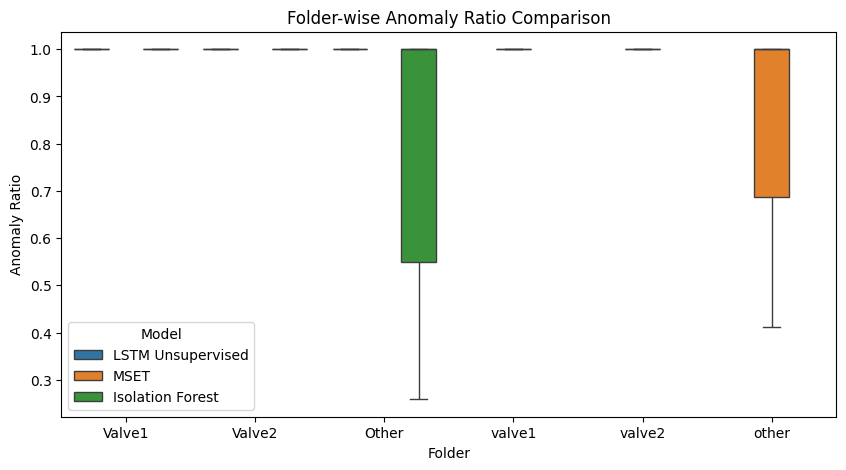

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=anomaly_models,
    x="folder",
    y="anomaly_ratio",
    hue="model"
)
plt.title("Folder-wise Anomaly Ratio Comparison")
plt.ylabel("Anomaly Ratio")
plt.xlabel("Folder")
plt.legend(title="Model")
plt.show()

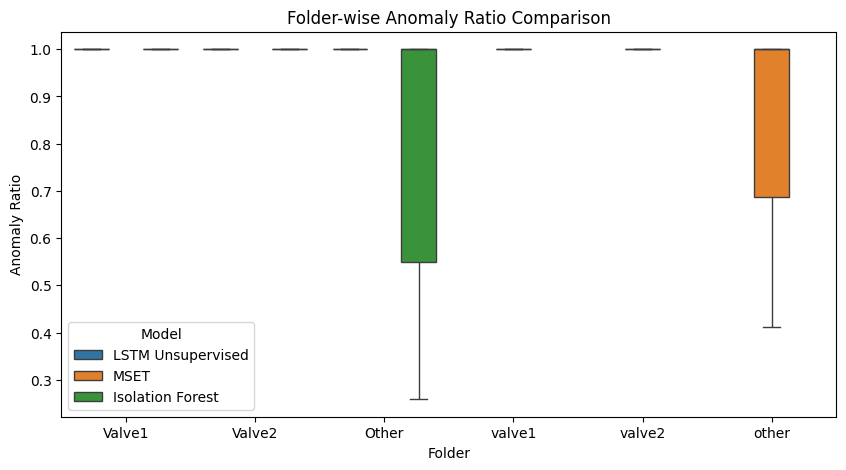

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=anomaly_models,
    x="folder",
    y="anomaly_ratio",
    hue="model"
)
plt.title("Folder-wise Anomaly Ratio Comparison")
plt.ylabel("Anomaly Ratio")
plt.xlabel("Folder")
plt.legend(title="Model")
plt.show()

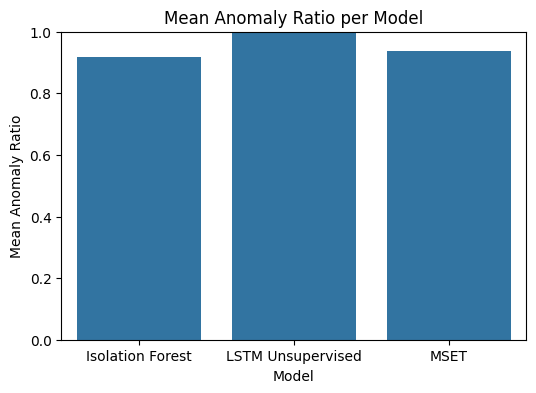

In [28]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=mean_anomaly,
    x="model",
    y="anomaly_ratio"
)
plt.title("Mean Anomaly Ratio per Model")
plt.ylabel("Mean Anomaly Ratio")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.show()

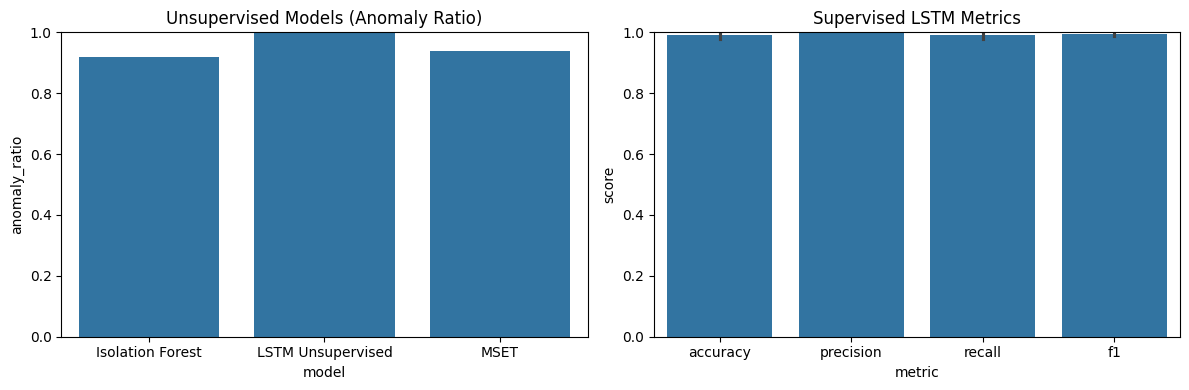

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(
    data=mean_anomaly,
    x="model",
    y="anomaly_ratio",
    ax=axes[0]
)
axes[0].set_title("Unsupervised Models (Anomaly Ratio)")
axes[0].set_ylim(0, 1)

sns.barplot(
    data=sup_metrics,
    x="metric",
    y="score",
    estimator="mean",
    ax=axes[1]
)
axes[1].set_title("Supervised LSTM Metrics")
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

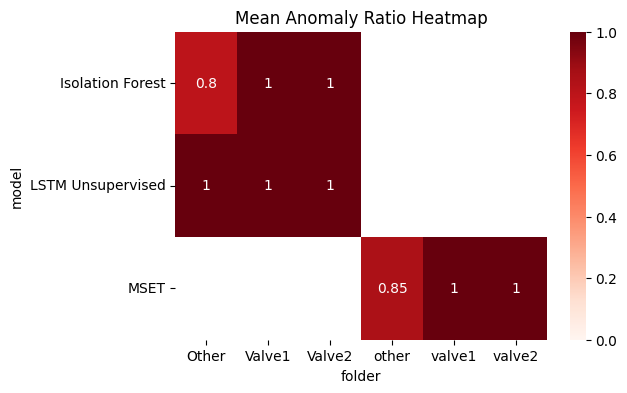

In [30]:
heatmap_df = (
    anomaly_models
    .groupby(["model", "folder"])["anomaly_ratio"]
    .mean()
    .reset_index()
    .pivot(index="model", columns="folder", values="anomaly_ratio")
)

plt.figure(figsize=(6, 4))
sns.heatmap(
    heatmap_df,
    annot=True,
    cmap="Reds",
    vmin=0,
    vmax=1
)
plt.title("Mean Anomaly Ratio Heatmap")
plt.show()

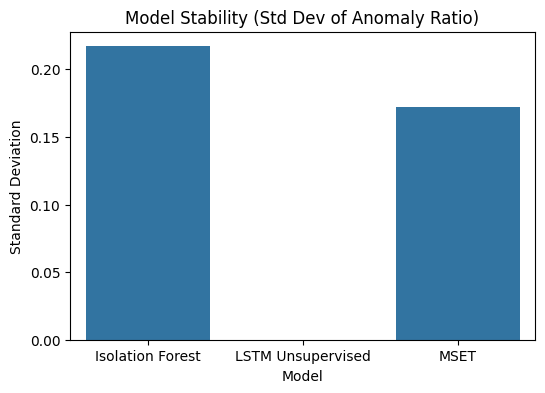

In [31]:
stability = (
    anomaly_models
    .groupby("model")["anomaly_ratio"]
    .std()
    .reset_index(name="std_dev")
)

plt.figure(figsize=(6, 4))
sns.barplot(
    data=stability,
    x="model",
    y="std_dev"
)
plt.title("Model Stability (Std Dev of Anomaly Ratio)")
plt.ylabel("Standard Deviation")
plt.xlabel("Model")
plt.show()